<a href="https://colab.research.google.com/github/JohnLucas22/Data_Visualization-Exploration/blob/main/NSFG_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Libraries
import pandas as pd 
from matplotlib import figure
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Questions: 
1. What is the average birth weight of babies in the USA?
2. What age are most women conceving babies at?

In [5]:
#Loading the data
from google.colab import files 
uploaded = files.upload()
print('uploaded')

Saving nsfg.hdf5 to nsfg.hdf5
uploaded


Exploring the Data with Pandas

In [6]:
nsfg = pd.read_hdf('nsfg.hdf5')

In [7]:
nsfg.shape

(9358, 10)

In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
ounces = nsfg.birthwgt_oz1
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

In [10]:
# replace outliers with nan (documentation says 98 and 99 refer to 'do not know')
# replace outliers with nan (documentation says 8 refers to 'no answer')
ounces.replace([98, 99], np.nan, inplace=True)
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [11]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100
preg_length = agepreg - agecon
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

Visually Exploring the Data with Matplotlib


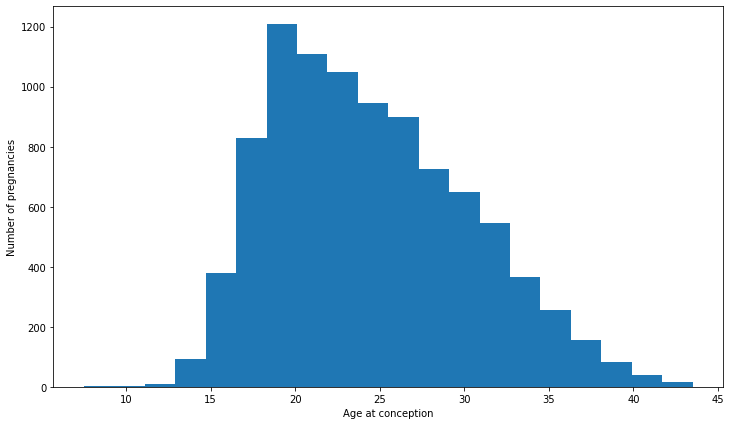

In [23]:
#looking into the age at conception and number of pregnancies at that age
plt.rcParams["figure.figsize"] = (12,7)
plt.hist(agecon, bins=20)
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.show()

In [26]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [27]:
full_term = nsfg['prglngth'] >= 37
full_term_weight = birth_weight[full_term]
print(full_term_weight.mean())

7.372323879231473


In [28]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


Questions & Answers: 
1. Q: What is the average birth weight of babies in the USA?
1. A: 7.372323879231473 Pounds
2. Q:What age are most women conceving babies at?
2. A: 20 Years Old 
